## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import hmean
import lda
from sklearn.metrics import roc_auc_score, roc_curve, auc, \
                            precision_recall_curve, average_precision_score

import tokenizers as t
import lda_implementation


## Get the Data

In [4]:
# read in data
filtered_10K = pd.read_csv('datasets/10K_filtered_restaurant_reviews.csv', encoding='utf-8')

coded = pd.read_excel('datasets/manually_coded_reviews.xlsx', encoding='utf-8')
coded.fillna(0, inplace=True)
coded['serv'] = (coded.service + coded.staff).apply(lambda x: 1 if x > 0 else 0)
coded['pos_serv'] = (coded.pos_service + coded.pos_staff).apply(lambda x: 1 if x > 0 else 0)
coded['neg_serv'] = (coded.neg_service + coded.neg_staff).apply(lambda x: 1 if x > 0 else 0)
coded.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
coded.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest1 = pd.read_excel('datasets/one_business_categorized.xlsx', encoding='utf-8')
rest1.fillna(0, inplace=True)
rest1['serv'] = (rest1.service + rest1.staff).apply(lambda x: 1 if x > 0 else 0)
rest1['pos_serv'] = (rest1.pos_service + rest1.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest1['neg_serv'] = (rest1.neg_service + rest1.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest1.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest1.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest2 = pd.read_excel('datasets/cat20rest1.xlsx', encoding='utf-8')
rest2.fillna(0, inplace=True)
rest2['serv'] = (rest2.service + rest2.staff).apply(lambda x: 1 if x > 0 else 0)
rest2['pos_serv'] = (rest2.pos_service + rest2.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest2['neg_serv'] = (rest2.neg_service + rest2.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest2.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest2.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest3 = pd.read_excel('datasets/cat20rest2.xlsx', encoding='utf-8')
rest3.fillna(0, inplace=True)
rest3['serv'] = (rest3.service + rest3.staff).apply(lambda x: 1 if x > 0 else 0)
rest3['pos_serv'] = (rest3.pos_service + rest3.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest3['neg_serv'] = (rest3.neg_service + rest3.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest3.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest3.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

rest4 = pd.read_excel('datasets/cat20rest3.xlsx', encoding='utf-8')
rest4.fillna(0, inplace=True)
rest4['serv'] = (rest4.service + rest4.staff).apply(lambda x: 1 if x > 0 else 0)
rest4['pos_serv'] = (rest4.pos_service + rest4.pos_staff).apply(lambda x: 1 if x > 0 else 0)
rest4['neg_serv'] = (rest4.neg_service + rest4.neg_staff).apply(lambda x: 1 if x > 0 else 0)
rest4.drop(['service', 'staff', 'pos_service', 'pos_staff', 'neg_service', 'neg_staff'], axis=1, inplace=True)
rest4.drop(['ambiance', 'cleanliness', 'pos_amb', u'neg_amb', 'pos_clean', 'neg_clean'], axis=1, inplace=True)

## Perform LDA

In [5]:
# prepare
cout_vect, rev_vec, rev_badlines = t.fitApplyVectorizer(filtered_10K.text, t.foodwordPolarityTokenizer)
reviews = filtered_10K.copy()
reviews = reviews[reviews.text.apply(lambda x: False if x in rev_badlines else True)]

code_vec, code_badlines = t.applyVectorizer(coded.text, t.foodwordPolarityTokenizer, cout_vect)
code_rev = coded.copy()
code_rev = code_rev[code_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest1_vec, rest1_badlines = t.applyVectorizer(rest1.text, t.foodwordPolarityTokenizer, cout_vect)
rest1_rev = rest1.copy()
rest1_rev = rest1_rev[rest1_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest2_vec, rest2_badlines = t.applyVectorizer(rest2.text, t.foodwordPolarityTokenizer, cout_vect)
rest2_rev = rest2.copy()
rest2_rev = rest2_rev[rest2_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest3_vec, rest3_badlines = t.applyVectorizer(rest3.text, t.foodwordPolarityTokenizer, cout_vect)
rest3_rev = rest3.copy()
rest3_rev = rest3_rev[rest3_rev.text.apply(lambda x: False if x in code_badlines else True)]

rest4_vec, rest4_badlines = t.applyVectorizer(rest4.text, t.foodwordPolarityTokenizer, cout_vect)
rest4_rev = rest4.copy()
rest4_rev = rest4_rev[rest4_rev.text.apply(lambda x: False if x in code_badlines else True)]

In [8]:
# fit
bestLDA = lda.LDA(n_topics=20, alpha=0.1, eta=0.01, random_state=1)
bestLDA.fit(rev_vec)

INFO:lda:n_documents: 9689
INFO:lda:vocab_size: 19491
INFO:lda:n_words: 616730
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -6311326
INFO:lda:<10> log likelihood: -4930696
INFO:lda:<20> log likelihood: -4742871
INFO:lda:<30> log likelihood: -4656503
INFO:lda:<40> log likelihood: -4605287
INFO:lda:<50> log likelihood: -4573961
INFO:lda:<60> log likelihood: -4545211
INFO:lda:<70> log likelihood: -4530084
INFO:lda:<80> log likelihood: -4511633
INFO:lda:<90> log likelihood: -4499942
INFO:lda:<100> log likelihood: -4491788
INFO:lda:<110> log likelihood: -4482927
INFO:lda:<120> log likelihood: -4474121
INFO:lda:<130> log likelihood: -4472589
INFO:lda:<140> log likelihood: -4466038
INFO:lda:<150> log likelihood: -4460622
INFO:lda:<160> log likelihood: -4458903
INFO:lda:<170> log likelihood: -4456468
INFO:lda:<180> log likelihood: -4453352
INFO:lda:<190> log likelihood: -4450629
INFO:lda:<200> log likelihood: -4449838
INFO:lda:<210> log likelihood: -4445191
INFO:lda

<lda.lda.LDA instance at 0x124c01200>

In [9]:
best_topics = lda_implementation.bestTopics(bestLDA, code_vec, code_rev)
best_topics

{'neg_food': ('topic_13',),
 'neg_price': ('topic_13',),
 'neg_serv': ('topic_10', 'topic_12'),
 'neg_wait': ('topic_12',),
 'pos_food': ('topic_5', 'topic_14'),
 'pos_price': ('topic_15', 'topic_19'),
 'pos_serv': ('topic_14', 'topic_17'),
 'pos_wait': ('topic_0', 'topic_19')}

### Look at ROC, Precision-Recall Curve, and thresholds

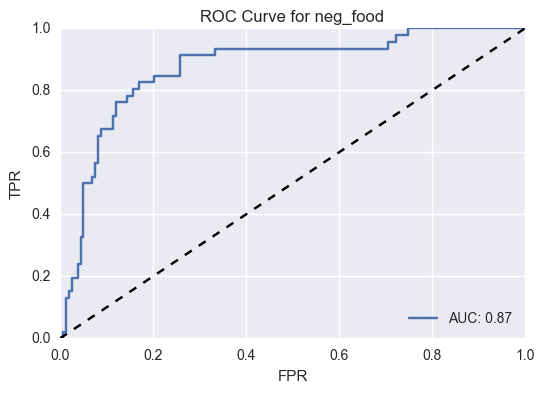

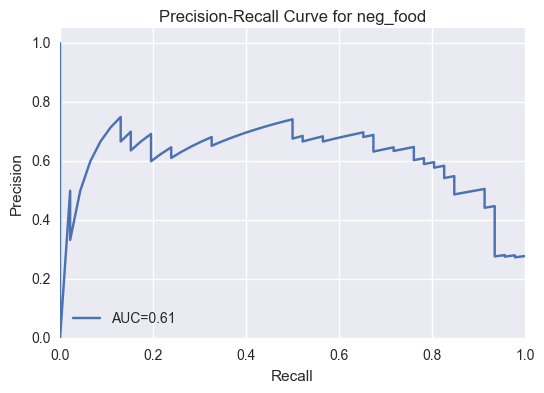

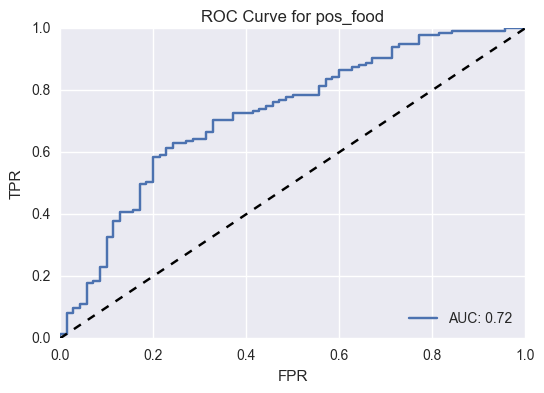

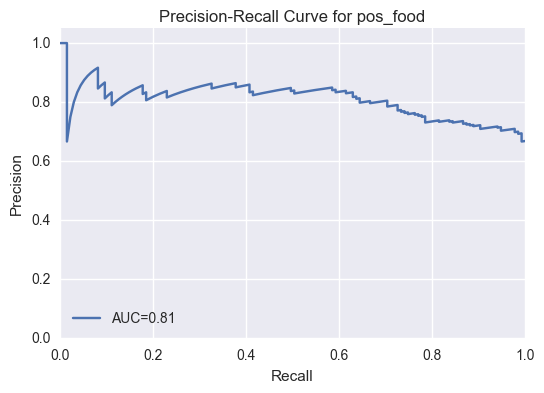

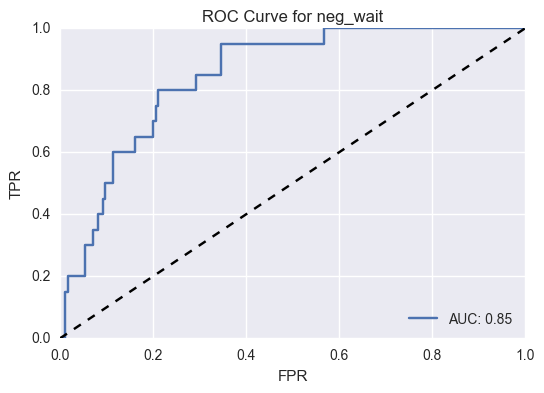

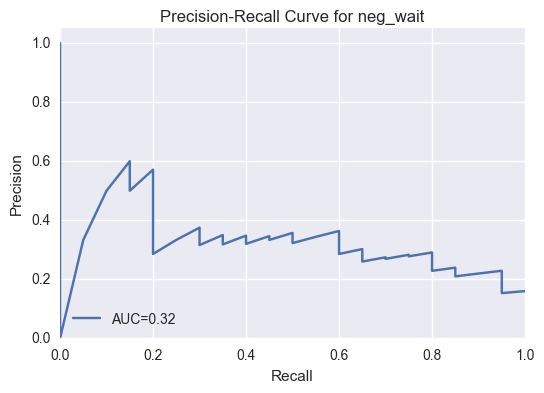

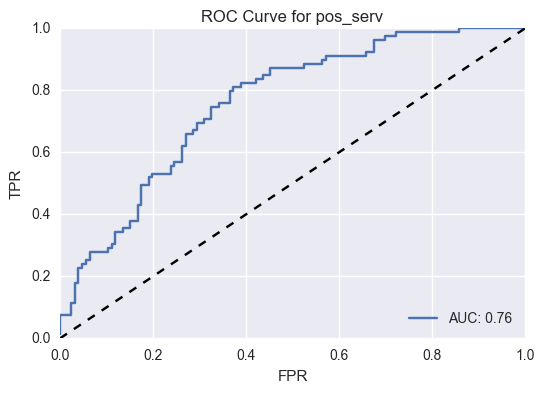

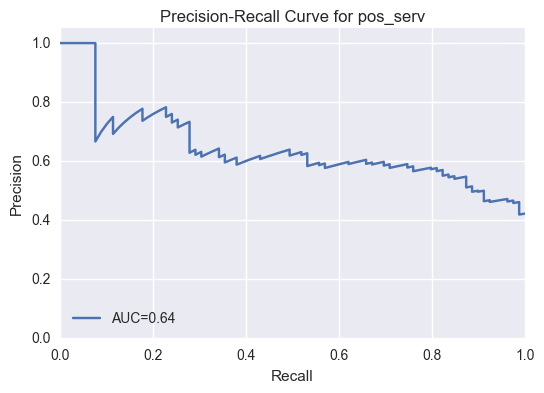

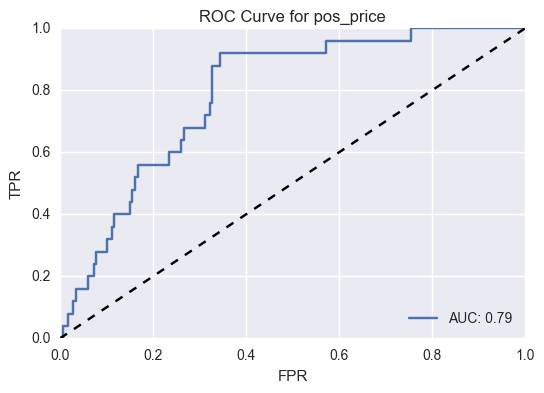

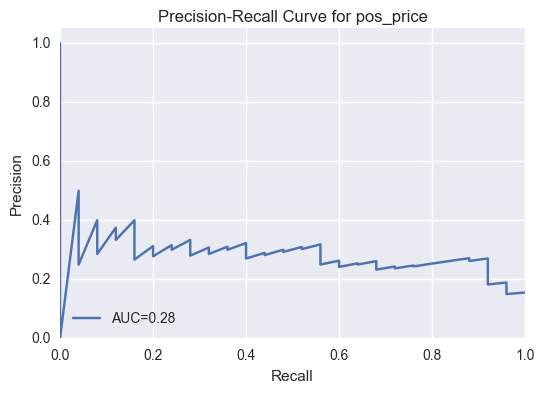

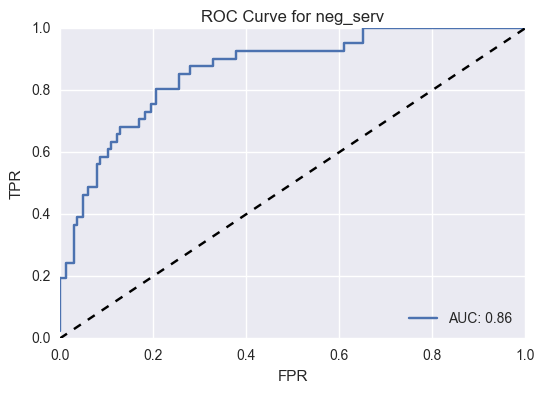

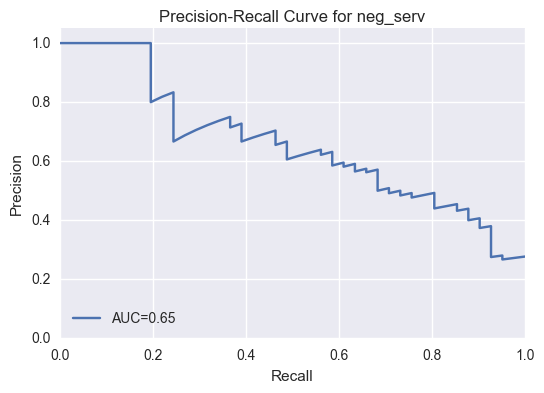

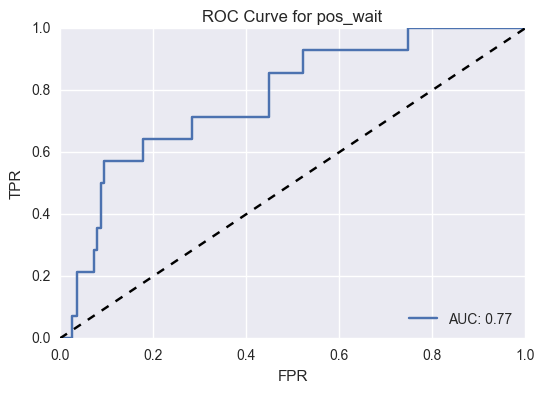

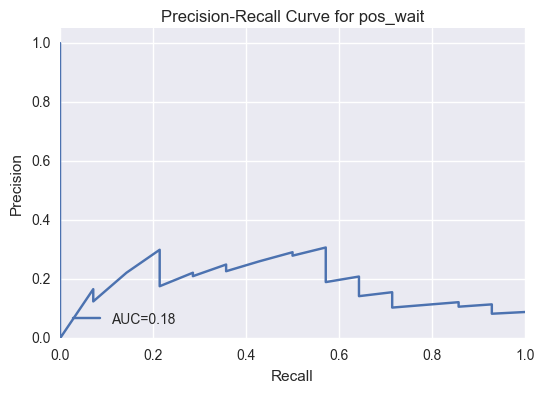

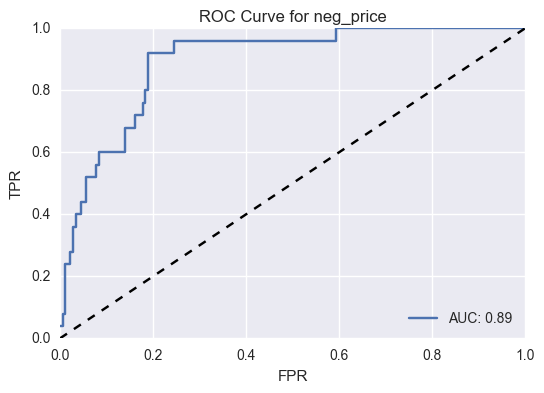

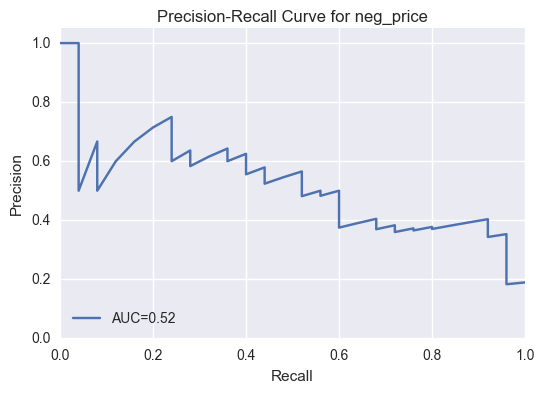

In [10]:
for column, best_tops in best_topics.items():
    auc_df, prc_df = lda_implementation.getCurves(bestLDA, code_vec, column, best_tops, code_rev)

Because precision is particularly important in this situation (misclassifying a good review as bad, for instance, is worse than missing some of the bad reviews), I only want to look at topics that *can* have a precision over 60% on the test set. Looking at the Precision-Recall curves above, only Bad Food, Good Food, Good Service, Bad Service, and Bad Price can do that. I will determine the threshold to use by selecting the threshold with the highest precision when recall is at least 50%.

In [248]:
import lda_implementation27 as lda_implementation

In [255]:
best_topics2 = {}
for column, best_tops in best_topics.items():
    if column in ['pos_food', 'neg_food', 'pos_serv', 'neg_serv', 'neg_price']:
        best_topics2[column] = best_tops
best_topics2

{'neg_food': ('topic_13',),
 'neg_price': ('topic_13',),
 'neg_serv': ('topic_10', 'topic_12'),
 'pos_food': ('topic_5', 'topic_14'),
 'pos_serv': ('topic_14', 'topic_17')}

In [256]:
best_thresholds = {}
for column, best_tops in best_topics2.items():
    imp = lda_implementation.bestThreshold3(bestLDA, code_vec, column, best_tops, code_rev)
    best_thresholds[column] = imp

In [257]:
best_thresholds

{'neg_food': 0.14174856147984144,
 'neg_price': 0.2338061934006484,
 'neg_serv': 0.18602277015110533,
 'pos_food': 0.10010768991205472,
 'pos_serv': 0.17202887759440721}

In [258]:
dic = {"Category": [],
    "Test_set_total": [],
    "Test_set_PREDtotal": [],
    "Test_set_accuracy": [],
    "Test_set_precision": [],
    "Test_set_recall": [],
    "Restaurant_1_total": [],
    "Restaurant_1_PREDtotal": [],
    "Restaurant_1_accuracy": [],
    "Restaurant_1_precision": [],
    "Restaurant_1_recall": [],
    "Restaurant_2_total": [],
    "Restaurant_2_PREDtotal": [],
    "Restaurant_2_accuracy": [],
    "Restaurant_2_precision": [],
    "Restaurant_2_recall": [],
    "Restaurant_3_total": [],
    "Restaurant_3_PREDtotal": [],
    "Restaurant_3_accuracy": [],
    "Restaurant_3_precision": [],
    "Restaurant_3_recall": [],
    "Restaurant_4_total": [],
    "Restaurant_4_PREDtotal": [],
    "Restaurant_4_accuracy": [],
    "Restaurant_4_precision": [],
    "Restaurant_4_recall": []
}
for column, best_tops in best_topics2.items():
    dic["Category"] += [column]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, code_vec, column, best_tops, code_rev, best_thresholds[column])
    dic["Test_set_total"] += [total]
    dic["Test_set_PREDtotal"] += [PREDtotal]
    dic["Test_set_accuracy"] += [acc]
    dic["Test_set_precision"] += [prec]
    dic["Test_set_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest1_vec, column, best_tops, rest1_rev, best_thresholds[column])
    dic["Restaurant_1_total"] += [total]
    dic["Restaurant_1_PREDtotal"] += [PREDtotal]
    dic["Restaurant_1_accuracy"] += [acc]
    dic["Restaurant_1_precision"] += [prec]
    dic["Restaurant_1_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest2_vec, column, best_tops, rest2_rev, best_thresholds[column])
    dic["Restaurant_2_total"] += [total]
    dic["Restaurant_2_PREDtotal"] += [PREDtotal]
    dic["Restaurant_2_accuracy"] += [acc]
    dic["Restaurant_2_precision"] += [prec]
    dic["Restaurant_2_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest3_vec, column, best_tops, rest3_rev, best_thresholds[column])
    dic["Restaurant_3_total"] += [total]
    dic["Restaurant_3_PREDtotal"] += [PREDtotal]
    dic["Restaurant_3_accuracy"] += [acc]
    dic["Restaurant_3_precision"] += [prec]
    dic["Restaurant_3_recall"] += [rec]
for column, best_tops in best_topics2.items():
    total, PREDtotal, acc, prec, rec = lda_implementation.restaurantSummary(bestLDA, rest4_vec, column, best_tops, rest4_rev, best_thresholds[column])
    dic["Restaurant_4_total"] += [total]
    dic["Restaurant_4_PREDtotal"] += [PREDtotal]
    dic["Restaurant_4_accuracy"] += [acc]
    dic["Restaurant_4_precision"] += [prec]
    dic["Restaurant_4_recall"] += [rec]

ACTUAL: neg_food: 0.224390243902
PREDICTED: neg_food: 0.20487804878
Accuracy: 0.853658536585, Precision: 0.690476190476, Recall: 0.630434782609


ACTUAL: neg_price: 0.121951219512
PREDICTED: neg_price: 0.107317073171
Accuracy: 0.887804878049, Precision: 0.545454545455, Recall: 0.48


ACTUAL: neg_serv: 0.2
PREDICTED: neg_serv: 0.170731707317
Accuracy: 0.843902439024, Precision: 0.628571428571, Recall: 0.536585365854


ACTUAL: pos_food: 0.658536585366
PREDICTED: pos_food: 0.448780487805
Accuracy: 0.653658536585, Precision: 0.847826086957, Recall: 0.577777777778


ACTUAL: pos_serv: 0.385365853659
PREDICTED: pos_serv: 0.312195121951
Accuracy: 0.692682926829, Precision: 0.625, Recall: 0.506329113924
ACTUAL: neg_food: 0.204081632653
PREDICTED: neg_food: 0.204081632653
Accuracy: 0.918367346939, Precision: 0.8, Recall: 0.8


ACTUAL: neg_price: 0.0
PREDICTED: neg_price: 0.183673469388
Accuracy: 0.816326530612, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.0408163265306
PREDICTED: neg_serv: 0.0408163265306
Accuracy: 0.918367346939, Precision: 0.0, Recall: 0.0


ACTUAL: pos_food: 0.775510204082
PREDICTED: pos_food: 0.571428571429
Accuracy: 0.673469387755, Precision: 0.892857142857, Recall: 0.657894736842
ACTUAL: pos_serv: 0.387755102041
PREDICTED: pos_serv: 0.428571428571
Accuracy: 0.632653061224, Precision: 0.52380952381, Recall: 0.578947368421
ACTUAL: neg_food: 0.263157894737
PREDICTED: neg_food: 0.315789473684
Accuracy: 0.631578947368, Precision: 0.333333333333, Recall: 0.4


ACTUAL: neg_price: 0.105263157895
PREDICTED: neg_price: 0.105263157895
Accuracy: 0.789473684211, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.157894736842
PREDICTED: neg_serv: 0.210526315789
Accuracy: 0.947368421053, Precision: 0.75, Recall: 1.0


ACTUAL: pos_food: 0.578947368421
PREDICTED: pos_food: 0.473684210526
Accuracy: 0.684210526316, Precision: 0.777777777778, Recall: 0.636363636364
ACTUAL: pos_serv: 0.157894736842
PREDICTED: pos_serv: 0.263157894737
Accuracy: 0.578947368421, Precision: 0.0, Recall: 0.0


ACTUAL: neg_food: 0.35
PREDICTED: neg_food: 0.25
Accuracy: 0.8, Precision: 0.8, Recall: 0.571428571429
ACTUAL: neg_price: 0.05
PREDICTED: neg_price: 0.15
Accuracy: 0.8, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.1
PREDICTED: neg_serv: 0.15
Accuracy: 0.95, Precision: 0.666666666667, Recall: 1.0


ACTUAL: pos_food: 0.65
PREDICTED: pos_food: 0.55
Accuracy: 0.7, Precision: 0.818181818182, Recall: 0.692307692308
ACTUAL: pos_serv: 0.4
PREDICTED: pos_serv: 0.2
Accuracy: 0.7, Precision: 0.75, Recall: 0.375
ACTUAL: neg_food: 0.35
PREDICTED: neg_food: 0.35
Accuracy: 0.8, Precision: 0.714285714286, Recall: 0.714285714286


ACTUAL: neg_price: 0.05
PREDICTED: neg_price: 0.15
Accuracy: 0.8, Precision: 0.0, Recall: 0.0
ACTUAL: neg_serv: 0.15
PREDICTED: neg_serv: 0.25
Accuracy: 0.9, Precision: 0.6, Recall: 1.0
ACTUAL: pos_food: 0.5
PREDICTED: pos_food: 0.4
Accuracy: 0.7, Precision: 0.75, Recall: 0.6
ACTUAL: pos_serv: 0.1
PREDICTED: pos_serv: 0.15
Accuracy: 0.85, Precision: 0.333333333333, Recall: 0.5


In [259]:
df = pd.DataFrame(dic)

In [260]:
# re-order columns
df = df[['Category',
    'Test_set_total',
    'Test_set_PREDtotal',
    'Test_set_recall',
    'Test_set_precision',
    'Test_set_accuracy',
    'Restaurant_1_total',
    'Restaurant_1_PREDtotal',
    'Restaurant_1_recall',
    'Restaurant_1_precision', 
    'Restaurant_1_accuracy',
    'Restaurant_2_total',
    'Restaurant_2_PREDtotal',
    'Restaurant_2_recall',
    'Restaurant_2_precision', 
    'Restaurant_2_accuracy',
    'Restaurant_3_total',
    'Restaurant_3_PREDtotal',
    'Restaurant_3_recall',
    'Restaurant_3_precision', 
    'Restaurant_3_accuracy',
    'Restaurant_4_total',
    'Restaurant_4_PREDtotal',
    'Restaurant_4_recall',
    'Restaurant_4_precision', 
    'Restaurant_4_accuracy']]

In [283]:
df

,Category,Test_set_total,Test_set_PREDtotal,Test_set_recall,Test_set_precision,Test_set_accuracy,Restaurant_1_total,Restaurant_1_PREDtotal,Restaurant_1_recall,Restaurant_1_precision,Restaurant_1_accuracy,Restaurant_2_total,Restaurant_2_PREDtotal,Restaurant_2_recall,Restaurant_2_precision,Restaurant_2_accuracy,Restaurant_3_total,Restaurant_3_PREDtotal,Restaurant_3_recall,Restaurant_3_precision,Restaurant_3_accuracy,Restaurant_4_total,Restaurant_4_PREDtotal,Restaurant_4_recall,Restaurant_4_precision,Restaurant_4_accuracy,average_recall,average_precision
0,neg_food,0.224390,0.204878,0.630435,0.690476,0.853659,0.204082,0.204082,0.800000,0.800000,0.918367,0.263158,0.315789,0.400000,0.333333,0.631579,0.35,0.25,0.571429,0.800000,0.80,0.35,0.35,0.714286,0.714286,0.80,0.623230,0.667619
1,neg_price,0.121951,0.107317,0.480000,0.545455,0.887805,0.000000,0.183673,0.000000,0.000000,0.816327,0.105263,0.105263,0.000000,0.000000,0.789474,0.05,0.15,0.000000,0.000000,0.80,0.05,0.15,0.000000,0.000000,0.80,0.096000,0.109091
2,neg_serv,0.200000,0.170732,0.536585,0.628571,0.843902,0.040816,0.040816,0.000000,0.000000,0.918367,0.157895,0.210526,1.000000,0.750000,0.947368,0.10,0.15,1.000000,0.666667,0.95,0.15,0.25,1.000000,0.600000,0.90,0.707317,0.529048
3,pos_food,0.658537,0.448780,0.577778,0.847826,0.653659,0.775510,0.571429,0.657895,0.892857,0.673469,0.578947,0.473684,0.636364,0.777778,0.684211,0.65,0.55,0.692308,0.818182,0.70,0.50,0.40,0.600000,0.750000,0.70,0.632869,0.817329
4,pos_serv,0.385366,0.312195,0.506329,0.625000,0.692683,0.387755,0.428571,0.578947,0.523810,0.632653,0.157895,0.263158,0.000000,0.000000,0.578947,0.40,0.20,0.375000,0.750000,0.70,0.10,0.15,0.500000,0.333333,0.85,0.392055,0.446429


In [263]:
df['average_recall'] = (df['Test_set_recall'] + df['Restaurant_1_recall'] + \
    df['Restaurant_2_recall'] + df['Restaurant_3_recall'] + df['Restaurant_4_recall'])/5
df['average_precision'] = (df['Test_set_precision'] + df['Restaurant_1_precision'] + \
    df['Restaurant_2_precision'] + df['Restaurant_3_precision'] + df['Restaurant_4_precision'])/5

In [264]:
df[['Category', 'average_recall', 'average_precision']]

,Category,average_recall,average_precision
0,neg_food,0.623230,0.667619
1,neg_price,0.096000,0.109091
2,neg_serv,0.707317,0.529048
3,pos_food,0.632869,0.817329
4,pos_serv,0.392055,0.446429


The model was unable to successfully work with the Bad Price topic, and didn't work great with the Good Service topic. However, the Bad Food, Good Food, and Bad Service topics are pretty good.

In [204]:
topic_word = bestLDA.topic_word_
n_top_words = 16
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(cout_vect.get_feature_names())[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print(u'Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: foodword positiveword breakfast egg negativeword brunch waffle pancake bacon potato toast food good place coffee french
Topic 1: foodword positiveword taco salsa chip mexican good bean burrito try order tortilla sauce food margarita fish
Topic 2: foodword positiveword burger sandwich fry negativeword cheese order good dog bread hot great onion just bacon
Topic 3: positiveword foodword negativeword bar table sit restaurant drink menu beer area place look nice night patio
Topic 4: foodword positiveword sushi buffet roll negativeword fish crab good vegas seafood fresh shrimp price quality tuna
Topic 5: foodword positiveword negativeword dish flavor sauce serve taste bit make add fresh sweet perfect menu cook
Topic 6: negativeword positiveword place just say eat think know good want thing make person really come look
Topic 7: positiveword place food best vegas great time restaurant love year make la town good new service
Topic 8: foodword positiveword pizza order cheese negativewo